# NAMA : Dinda Salsabiila Syara Putri Anugrah
# NIM     : 1306619024

## Mengklasifikasikan Sistem Kristal Katoda Silikat Li-ion Berdasarkan Sifat Fisika dan Kimia nya Menggunakan Metode Decision Tree Classifier

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Read CSV File

In [2]:
df = pd.read_csv("lithium-ion batteries.csv")

In [3]:
df

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic
...,...,...,...,...,...,...,...,...,...,...,...
334,mp-764961,Li6Co(SiO4)2,P1,-2.545,0.071,2.685,17,2.753,171.772,True,triclinic
335,mp-849520,LiCo3(SiO4)2,P1,-2.250,0.076,0.005,42,3.318,552.402,True,triclinic
336,mp-849656,Li5Co4(Si3O10)2,P1,-2.529,0.082,0.176,35,2.940,428.648,True,triclinic
337,mp-763557,LiCoSiO4,P1,-2.348,0.087,1.333,14,2.451,214.044,True,triclinic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


### Data Pre-processing

In [5]:
df = df.drop(['Materials Id'], axis=1)

In [6]:
numerical_transformer = StandardScaler()
label_transformer = OrdinalEncoder()

n_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64', 'int32', 'float32']]
obj_cols = [c for c in df.columns if df[c].dtype in ['object', 'bool']]
print(n_cols, obj_cols)

ct = ColumnTransformer([('num', numerical_transformer, n_cols), ('non_num', label_transformer, obj_cols),])
processed = ct.fit_transform(df)
new_df = pd.DataFrame(columns=df.columns, data=processed)
new_df.head()

['Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites', 'Density (gm/cc)', 'Volume'] ['Formula', 'Spacegroup', 'Has Bandstructure', 'Crystal System']


,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,-0.447048,-1.722253,1.272374,-0.988690,0.025455,-0.989769,54.0,31.0,1.0,0.0
1,-0.430703,-1.656286,0.735721,-0.296020,-0.164107,-0.350714,54.0,21.0,1.0,0.0
2,-0.861132,-1.524351,1.448190,-0.469187,-0.630939,-0.567989,81.0,6.0,1.0,0.0
3,-0.904720,-1.491367,0.860909,-0.036268,-0.215034,-0.108070,79.0,1.0,1.0,0.0
4,-0.708575,-1.392416,0.458650,-0.122852,0.990242,-0.159045,48.0,1.0,1.0,0.0


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Formula                339 non-null    float64
 1   Spacegroup             339 non-null    float64
 2   Formation Energy (eV)  339 non-null    float64
 3   E Above Hull (eV)      339 non-null    float64
 4   Band Gap (eV)          339 non-null    float64
 5   Nsites                 339 non-null    float64
 6   Density (gm/cc)        339 non-null    float64
 7   Volume                 339 non-null    float64
 8   Has Bandstructure      339 non-null    float64
 9   Crystal System         339 non-null    float64
dtypes: float64(10)
memory usage: 26.6 KB


### Data Visualization

<AxesSubplot:>

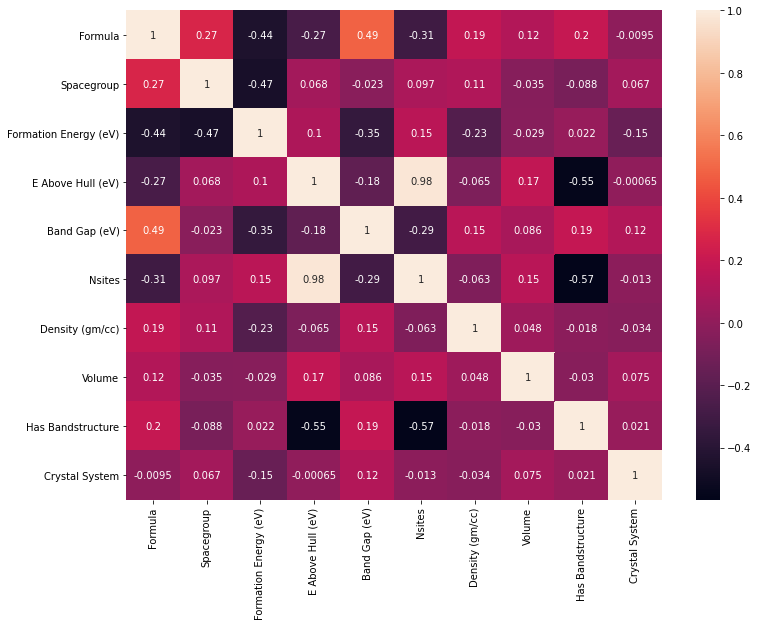

In [8]:
correlation = new_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation, annot=True)

### Splitting Data

In [9]:
x = new_df.drop(["Crystal System"], axis=1)
y = new_df["Crystal System"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

### Decision Tree

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=40, random_state = 0)

In [12]:
clf = model.fit(x_train, y_train)

In [13]:
feature_importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_importance

Volume                   0.973337
Nsites                   0.026663
Formula                  0.000000
Spacegroup               0.000000
Formation Energy (eV)    0.000000
E Above Hull (eV)        0.000000
Band Gap (eV)            0.000000
Density (gm/cc)          0.000000
Has Bandstructure        0.000000
dtype: float64

### Tree Visualization

In [14]:
dot_data = tree.export_graphviz(model, out_file=None, feature_names=new_df.columns[:-1], filled = True)

In [15]:
graph = graphviz.Source(dot_data)
graph.view()

'Source.gv.pdf'

### Predict Testing Data

In [16]:
y_pred = clf.predict(x_test)

### Classification report and accuracy score

In [17]:
akurasi = classification_report(y_test, y_pred)
print('Akurasi: ', akurasi)

Akurasi:                precision    recall  f1-score   support

         0.0       0.78      0.85      0.82        47
         1.0       0.80      0.72      0.76        39
         2.0       1.00      1.00      1.00        16

    accuracy                           0.82       102
   macro avg       0.86      0.86      0.86       102
weighted avg       0.82      0.82      0.82       102



In [18]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat akurasi: %d persen"%(akurasi*100))

Tingkat akurasi: 82 persen


### Confusion Matrix

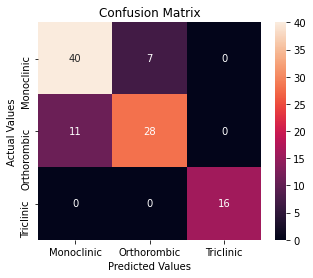

In [19]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Monoclinic','Orthorombic','Triclinic'], 
                     columns = ['Monoclinic','Orthorombic','Triclinic'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Actual and predicted table

In [20]:
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1

,Actual,Predicted
76,0.0,1.0
270,2.0,2.0
224,1.0,1.0
159,1.0,1.0
241,1.0,0.0
...,...,...
229,1.0,0.0
34,0.0,0.0
142,1.0,1.0
97,0.0,0.0
